# Actividad evaluable del módulo 2: Clasificación de vinos

En este módulo, volveremos a tratar los problemas de clasificación binarios, pero esta vez con un conjunto de datos del mundo real.

Para la actividad, hemos elegido un conjunto de datos sobre la calidad del vino (https://archive.ics.uci.edu/ml/datasets/wine+quality). Este conjunto contiene información sobre más de 6000 botellas de vino tinto y blanco. Su tarea será desarrollar un clasificador de una sola neurona capaz de distinguir entre ambas variedades con una precisión razonable. Más abajo, hemos incluido código que le servirá de ayuda para subir los archivos y preparar el conjunto (se trata de una buena oportunidad para aprender Python en la práctica). Además, hemos incluido las llamadas finales a la función que queremos que ejecute para entrenar y evaluar su clasificador. No dude en reutilizar código que ya haya visto o escrito en cuadernos anteriores.

In [167]:
#Descargar los archivos .csv del repositorio de datos
!rm -f winequality-red.csv winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-12-06 23:23:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 84199 (82K) [application/x-httpd-php]
Grabando a: «winequality-red.csv»

winequality-red.csv 100%[===================>]  82,23K   200KB/s    en 0,4s    

2022-12-06 23:23:32 (200 KB/s) - «winequality-red.csv» guardado [84199/84199]

--2022-12-06 23:23:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 264426 (258K) [application/x-httpd-php]
Grabando a: «winequality-white.csv»

wine

In [3]:
#Estos son los paquetes necesarios para completar esta actividad
import pandas as pd
import numpy as np

#Utilice Pandas para leer el archivo CSV en un marco de datos
#Fíjese en que, en este .CSV, el delimitador es un punto y coma, ";", en vez de una coma
df_red = pd.read_csv('winequality-red.csv',delimiter=";")

#Como estamos realizando una tarea de clasificación, les asignaremos a todos los vinos tintos la etiqueta 1
df_red["color"] = 1

#El método .head() es muy útil para previsualizar los datos
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df_white = pd.read_csv('winequality-white.csv',delimiter=";")
df_white["color"] = 0  #Asignaremos a todos los vinos blancos la etiqueta 0
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [5]:
#Ahora, combinamos los dos marcos de datos
df = pd.concat([df_red, df_white])

#Y mezclamos los datos de los vinos blancos y los tintos
df = df.sample(frac=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


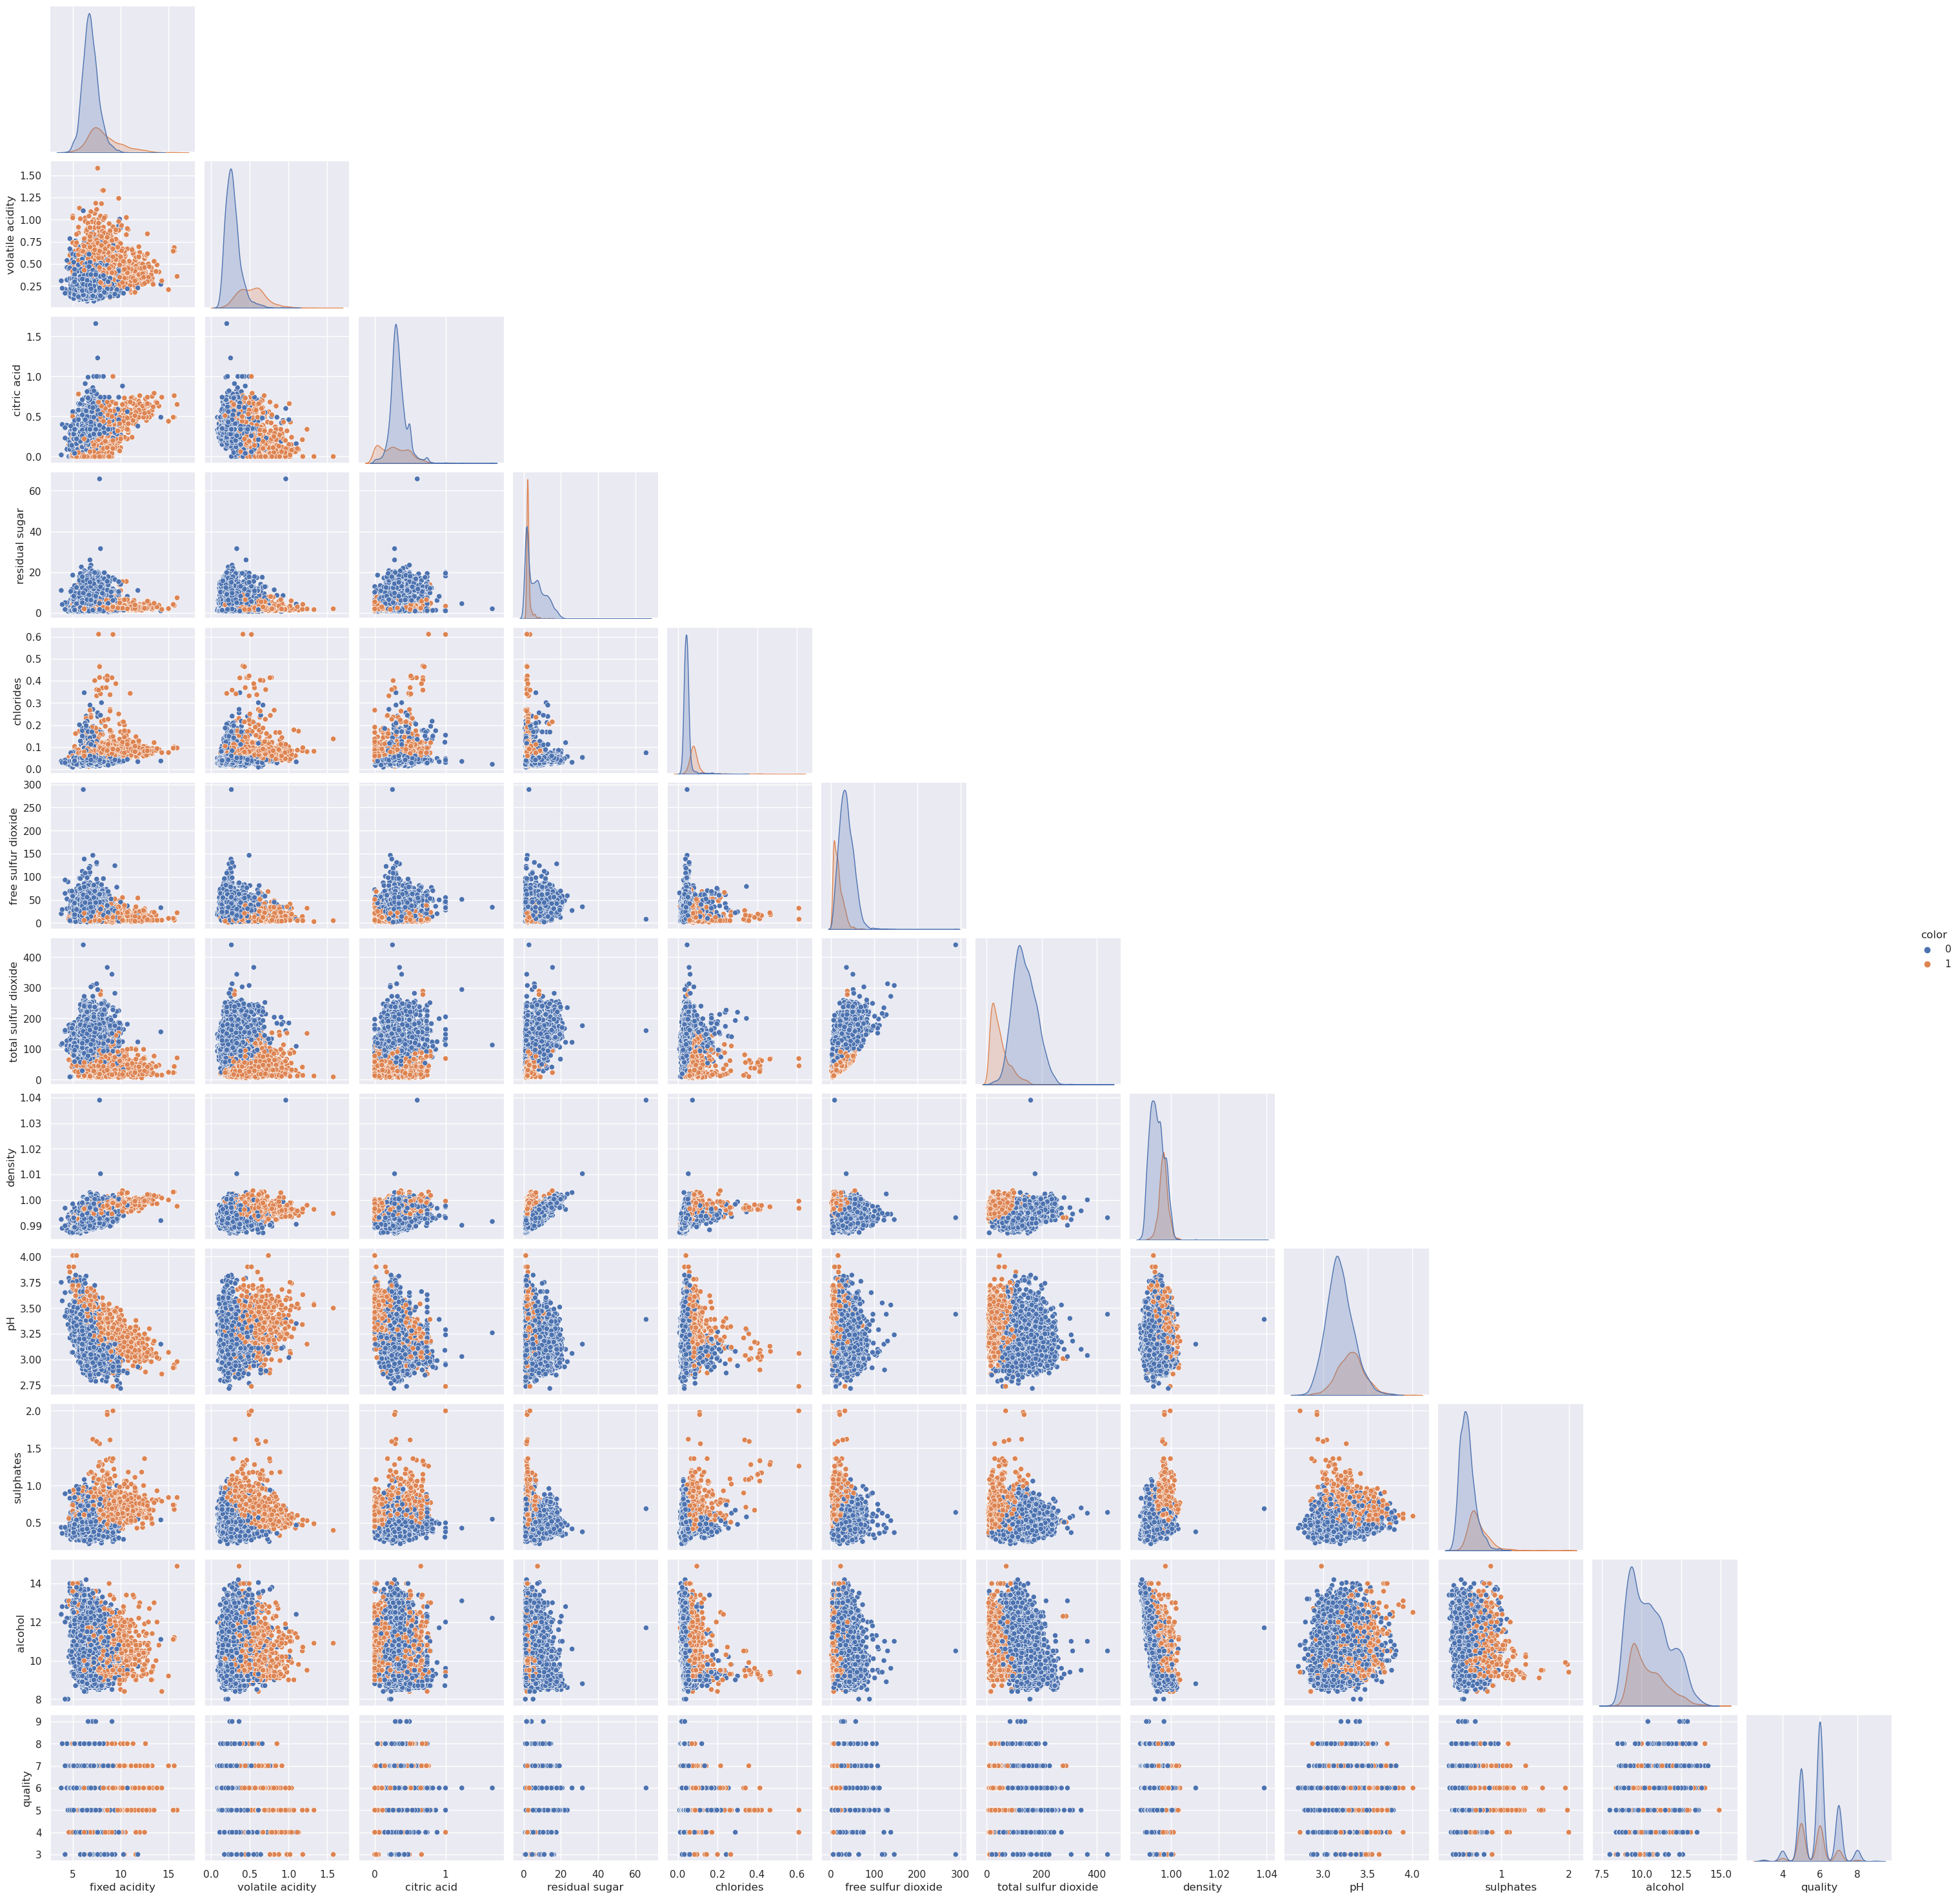

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='color', corner=True)
plt.show(sns)

### Elección de atributos

Según el grafico de a pares de los datos (discriminando por color del vino), se pueden observar que los atributos "volatile acidity", "chlorides" y "total sulfur dioxide" separan un poco mejor las clases de vinos que los atributos propuestos por este cuaderno

Al final se compara la precisión del modelo usando ambos conjuntos de atributos

In [6]:
#Elegimos tres atributos en los que basar la predicción
# input_columns = ["citric acid", "residual sugar", "total sulfur dioxide"]     # Atributos propuestos
input_columns = ["volatile acidity", "chlorides", "total sulfur dioxide"]       # Nuevos atributos
output_columns = ["color"]

#Extraemos los atributos relevantes en los arrays x e y
X = df[input_columns].to_numpy()
Y = df[output_columns].to_numpy()
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
in_features = X.shape[1]

Shape of X: (6497, 3)
Shape of Y: (6497, 1)


## Fuentes utilizadas para resolver el ejercicio:
- https://colab.research.google.com/drive/17zfQKaHWvfA9O94mzW-7cLMi0HQK0HFD#scrollTo=L6uSsA98ffTq (Cuaderno de la clase para implementar una neurona con clases de python)

In [7]:
#Inserte aquí su código

# Modelo de clasificación
class SingleNeuronClassificationModel():

    def __init__(self, in_features):
        # Iniciamos los parametros con valores aleatorios distintos de cero
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # Valor para dar margen y no dividir por cero

    def forward(self, x):
        # Calcular y guardar la preactivación z 
        self.z = np.dot(x, self.w.T) + self.w_0
    
        # Aplicar la función de activación y devolver
        self.a = self.activation(self.z)
        return self.a
  
    # Función de activación sigmoide para la clasificación
    def activation(self, z):
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradiente del output respecto a los pesos para la activación sigmoide
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)        

    # Actualizar los pesos en función de los gradientes y la tasa de aprendizaje
    def update(self, grad_loss, learning_rate):
        self.w   -= grad_loss * self.grad_w   * learning_rate
        self.w_0 -= grad_loss * self.grad_w_0 * learning_rate

In [8]:
featureLen = len(X[0])
model = SingleNeuronClassificationModel(in_features=featureLen)

In [224]:
def singleTestModel(model, X, Y):
    print("Predicted\t= {}\nReal\t\t= {}\nInput\t\t= {}".format(
        model.forward(X),
        Y,
        np.array_str(X, precision=3, suppress_small=True),
    ))

singleTestModel(model, X=X[0], Y=df['color'][0])

Predicted	= [7.72283563e-05]
Real		= 0
Input		= [  0.28    0.132 127.   ]


In [9]:
# Funcion para entrenar el modelo  mediante el descenso del gradiente
def train_model_NLL_loss(model, input_data, output_data, learning_rate, num_epochs):

    non_zero_tolerance = 1e-8 # Valor para dar margen y no dividir por cero
    num_samples = len(input_data)
    
    for epoch in range(1, num_epochs+1):
        total_loss = 0  # Acumulador de la pérdida total en todo el conjunto de datos en una epoca

        for i in range(num_samples):
            x = input_data[i, ...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # Función de pérdida de NLL
            loss = -(y * np.log(y_predicted + non_zero_tolerance) +
                     (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # Gradiente de la predicción respecto a los pesos
            model.gradient(x)

            # Gradiente de la pérdida respecto a la predicción para NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))

            # Actualizar el modelo en función del gradiente
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0:  # Cada pocos ciclos, generar un informe
            print("epoch", epoch, "has total loss", total_loss)

In [10]:
#Entrenamiento del modelo...

l_rate = 0.001
epochs = 200

train_model_NLL_loss(model, input_data=X, output_data=Y, learning_rate=l_rate, num_epochs=epochs)

#Utilizaremos esta función para evaluar el rendimiento del clasificador entrenado
#Pista: el modelo que defina más arriba debe tener una función .forward para ser compatible
#Pista: la función de evaluación es idéntica a la de los cuadernos anteriores
def evaluate_classification_accuracy(model, input_data, labels):
    #Contar el número de muestras clasificadas correctamente dado un número de pesos
    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

epoch 1 has total loss [6361.34879305]
epoch 20 has total loss [2976.28580087]
epoch 40 has total loss [2705.62143451]
epoch 60 has total loss [2581.48015532]
epoch 80 has total loss [2503.47192961]
epoch 100 has total loss [2442.20946794]
epoch 120 has total loss [2386.35319316]
epoch 140 has total loss [2335.32502847]
epoch 160 has total loss [2284.72355419]
epoch 180 has total loss [2236.34535252]
epoch 200 has total loss [2192.25296246]


In [11]:
evaluate_classification_accuracy(model, X, Y)

Our model predicted 6131 out of 6497 correctly for 94.36663075265507 % accuracy


0.9436663075265507

### Comparacion de precisión
Utilizando los atributos ["citric acid", "residual sugar", "total sulfur dioxide"] se obtiene:
- 91.54 % de precisión, con 5948 de 6497 muestras clasificadas correctamente

Utilizando los atributos ["volatile acidity", "chlorides", "total sulfur dioxide"] se obtiene:
- 94.45 % de precisión, con 6137 de 6497 muestras clasificadas correctamente

In [12]:
rowID = 12
singleTestModel(model, X=X[rowID], Y=df['color'][rowID])

NameError: name 'singleTestModel' is not defined